In [81]:
import sys
import os 
import pickle
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from tqdm import tqdm


plt.style.use('seaborn-v0_8-bright')

Import either Allensdk or Minisdk depending on your computer setup.

In [ ]:
# Import Allen SDK

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

In [82]:
#If your computer is going low on RAM, commment the line above and use this instead:

sys.path.append('../')
from minisdk.core import EcephysProjectCache

Loading the necessary data. Run the cell depending on the environment you are using.

In [4]:
data_dir = "../allendata"
# Again, we might want to use another folder if we do want to overwrite potential data we have

In [83]:
data_dir = "../converted"

In [84]:
#From here on everything works with both AllenSDK and the MiniSDK!
manifest_path = os.path.join(data_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

#Grab our (filtered) data from our favorite session. We take a female mice with nice unit count
session_id = 798911424 
oursession = cache.get_session_data(session_id)#, timeout=3000)

In [85]:
#Takes around 500 MB of disk space, a bit more once is decompressed in RAM
from minisdk.core import Allen2MiniConverter
converter = Allen2MiniConverter()
converter.write_metadata_csv(cache)
converter.write_session_data(oursession)

/Users/daniyarzakarin/Documents/Uni/computational neuroscience/project/notebooks/../minisdk/core.py:118: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  sti = pd.read_csv(f"{self.path2data}/stimuli.csv", index_col="stimulus_presentation_id")


In [86]:
# Stimulus names
sti_table = oursession.get_stimulus_table()
sti_names = set(sti_table.stimulus_name)    
print(sti_names)

{'drifting_gratings_contrast', 'gabors', 'natural_scenes', 'natural_movie_one', 'natural_movie_three', 'spontaneous', 'static_gratings', 'drifting_gratings', 'flashes'}


/Users/daniyarzakarin/Documents/Uni/computational neuroscience/project/notebooks/../minisdk/core.py:118: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  sti = pd.read_csv(f"{self.path2data}/stimuli.csv", index_col="stimulus_presentation_id")


In [87]:
for name in sti_names:
    print(f'There are {(sti_table["stimulus_name"] == name).sum()} stimuli with {name}')

There are 540 stimuli with drifting_gratings_contrast
There are 3645 stimuli with gabors
There are 5950 stimuli with natural_scenes
There are 18000 stimuli with natural_movie_one
There are 36000 stimuli with natural_movie_three
There are 16 stimuli with spontaneous
There are 6000 stimuli with static_gratings
There are 630 stimuli with drifting_gratings
There are 150 stimuli with flashes


In [88]:
mask = (sti_table['stimulus_name'] == 'natural_scenes')
natural_scenes = sti_table[mask]
del mask
natural_scenes.head()

stimulus_block   start_time    stop_time  \
stimulus_presentation_id                                             
51355                                9.0  5909.794447  5910.044666   
51356                                9.0  5910.044666  5910.294885   
51357                                9.0  5910.294885  5910.545104   
51358                                9.0  5910.545104  5910.795324   
51359                                9.0  5910.795324  5911.045522   

                         spatial_frequency  frame  y_position  x_position  \
stimulus_presentation_id                                                    
51355                                  NaN   13.0         NaN         NaN   
51356                                  NaN   38.0         NaN         NaN   
51357                                  NaN   30.0         NaN         NaN   
51358                                  NaN   35.0         NaN         NaN   
51359                                  NaN  112.0         NaN         NaN   

                          color phase   stimulus_name  temporal_frequency  \
stimulus_presentation_id                                                    
51355                       NaN   NaN  natural_scenes                 NaN   
51356                       NaN   NaN  natural_scenes                 NaN   
51357                       NaN   NaN  natural_scenes                 NaN   
51358                       NaN   NaN  natural_scenes                 NaN   
51359                       NaN   NaN  natural_scenes                 NaN   

                          contrast size  orientation  duration  \
stimulus_presentation_id                                         
51355                          NaN  NaN          NaN  0.250219   
51356                          NaN  NaN          NaN  0.250219   
51357                          NaN  NaN          NaN  0.250219   
51358                          NaN  NaN          NaN  0.250219   
51359                          NaN  NaN          NaN  0.250198   

                          stimulus_condition_id  
stimulus_presentation_id                         
51355                                      4908  
51356                                      4909  
51357                                      4910  
51358                                      4911  
51359                                      4912

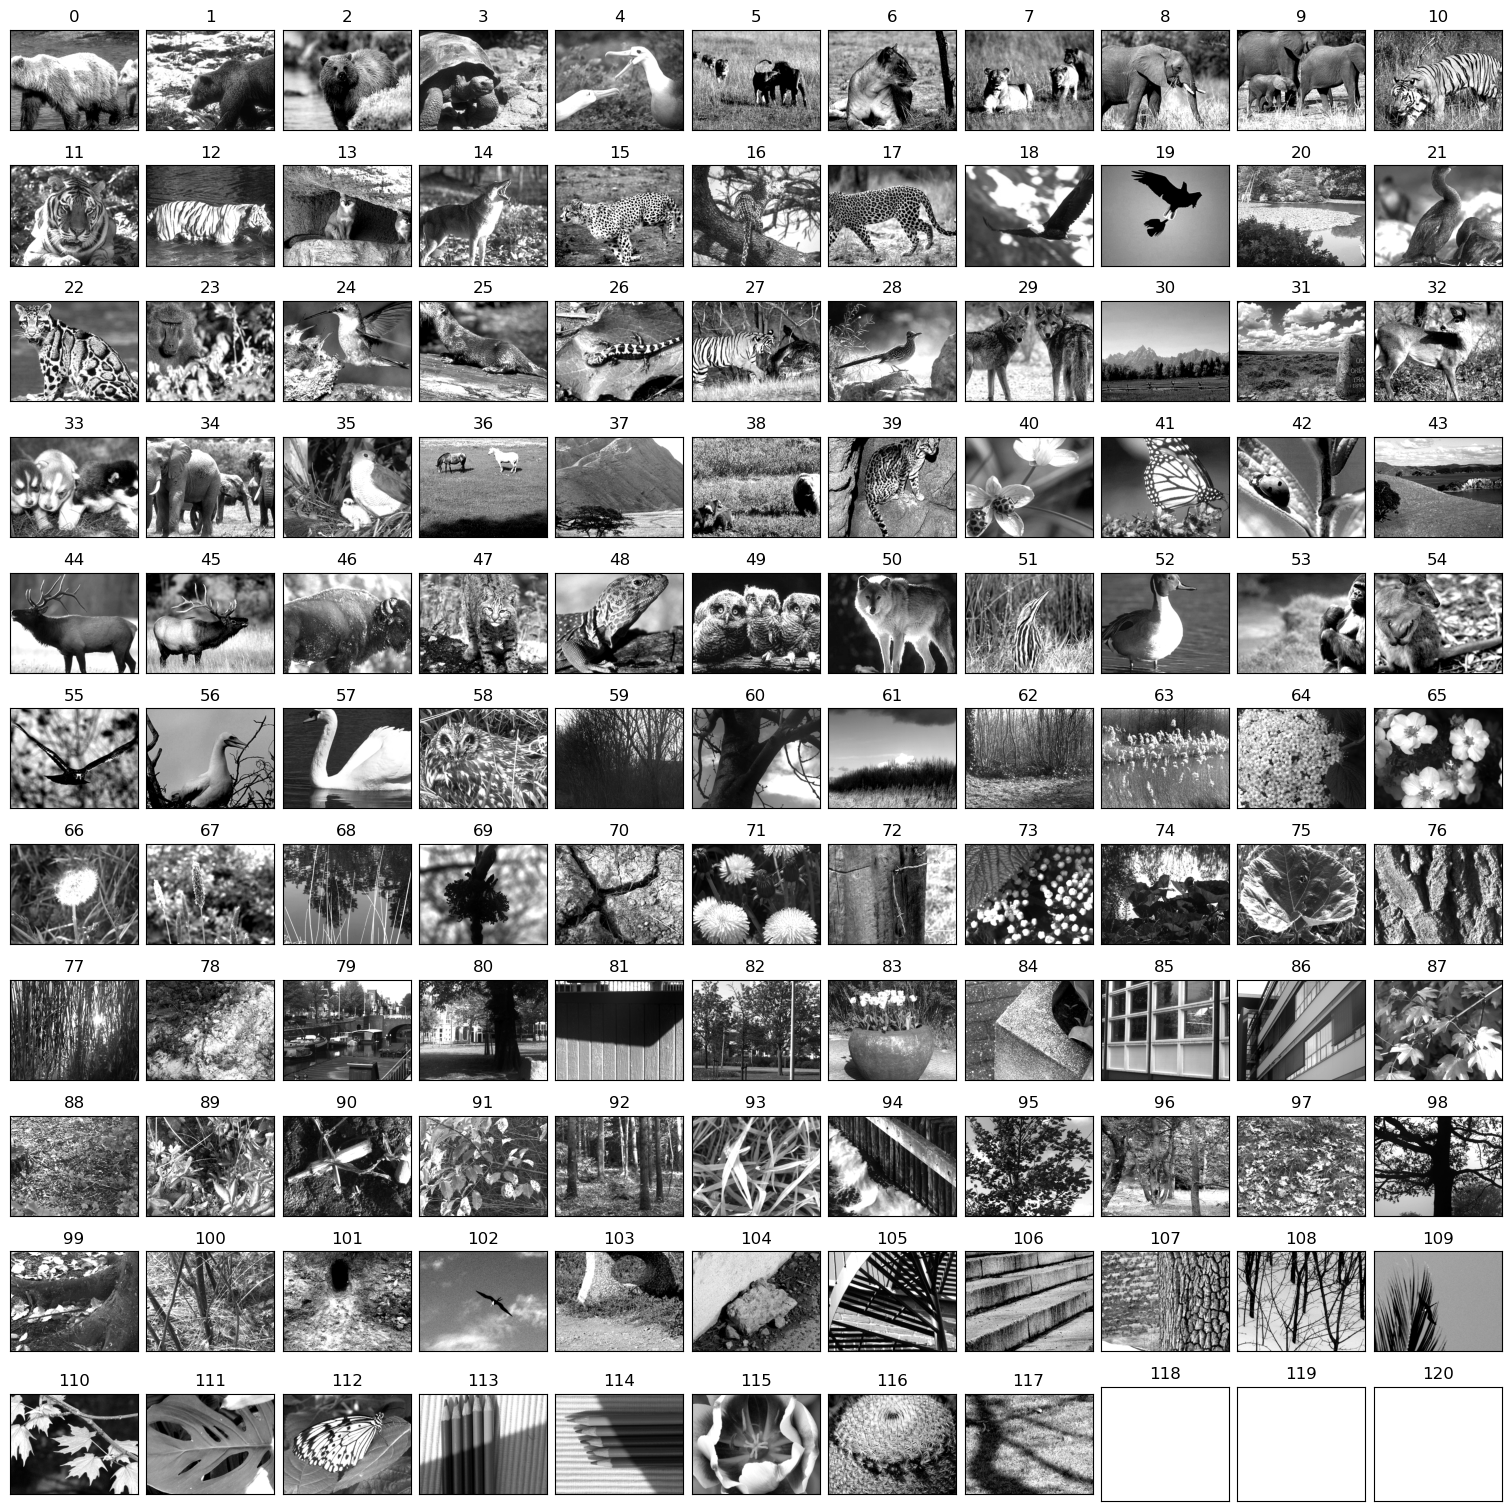

In [89]:
#Download the 118 photos of the natural scenes. 
#First time they need to be downloaded.
nphotos = 118
for i in range(nphotos):
    tmp = cache.get_natural_scene_template(i)
del tmp

#Convert them to use with the MiniSDK if needed
#converter.write_natural_images()
#Let's create a beautiful 11x11 reference plot with all the images
fig, axes = plt.subplots(ncols=11, nrows=11, figsize=(15,15), layout="constrained")
L = 11
for x in range(L):
    for y in range(L):
        index = y + x*L 
        axes[x,y].set_title(index)
        axes[x,y].set_xticks([])
        axes[x,y].set_yticks([])
        if index < 118:
            axes[x,y].imshow(cache.get_natural_scene_template(index), cmap="gray")

plt.savefig("natural_scenes.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [90]:
#Get the ids of the images and the units 
image_ids = oursession.get_stimulus_table("natural_scenes").index.values
visam_ids = oursession.units[oursession.units["ecephys_structure_acronym"]=="VISam"].index.values

print(f'We have {image_ids.shape[0]} images and {visam_ids.shape[0]} units')

We have 5950 images and 135 units


/Users/daniyarzakarin/Documents/Uni/computational neuroscience/project/notebooks/../minisdk/core.py:118: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  sti = pd.read_csv(f"{self.path2data}/stimuli.csv", index_col="stimulus_presentation_id")


In [91]:
image_ids

array([51355, 51356, 51357, ..., 68226, 68227, 68228])

In [92]:
natural_scenes.loc[51355]

stimulus_block                      9.0
start_time                  5909.794447
stop_time                   5910.044666
spatial_frequency                   NaN
frame                              13.0
y_position                          NaN
x_position                          NaN
color                               NaN
phase                               NaN
stimulus_name            natural_scenes
temporal_frequency                  NaN
contrast                            NaN
size                                NaN
orientation                         NaN
duration                       0.250219
stimulus_condition_id              4908
Name: 51355, dtype: object

In [93]:
def get_n_spikes_in_time_interval(session, regionstr, time_start, time_end):
    #Filter neurons in the desired region
    #IDs of these neuron are set as the indices of the units table
    region_ids = session.units[session.units["ecephys_structure_acronym"]==regionstr].index.values

    #Get the spike times as a list of numpy arrays instead of dictionary
    #spike_times[id] is a numpy array
    region_spikes = {}
    for id in region_ids:
        #Filter spikes in the interval (time_start, time_end) ms.
        #A single neuron can have 20000 spikes, and eventplot would struggle
        spikes = session.spike_times[id]
        region_spikes[id] = len(spikes[(spikes > time_start) & (spikes < time_end)])

    return region_spikes

import bisect
def get_n_spikes_in_time_interval_with_bisect(session, regionstr, time_start, time_end):
    #Filter neurons in the desired region
    #IDs of these neuron are set as the indices of the units table
    region_ids = session.units[session.units["ecephys_structure_acronym"]==regionstr].index.values

    #Get the spike times as a list of numpy arrays instead of dictionary
    #spike_times[id] is a numpy array
    region_spikes = {}
    for id in region_ids:
        #Filter spikes in the interval (time_start, time_end) ms.
        #A single neuron can have 20000 spikes, and eventplot would struggle
        spikes = session.spike_times[id]
        R = bisect.bisect_left(spikes, time_end)
        L = bisect.bisect_left(spikes, time_start)
        region_spikes[id] = R - L

    return region_spikes


In [100]:
def get_spike_vectors(session, delay : float, stimuli : pd.DataFrame, regionstr : str, window_size : float = None, partial : float = None):
    """Should return a DataFrame where each line corresponds to a vector of 
    spike numbers for each unit. Could be optimized!"""
    sti_ids = stimuli.index.values
    if not partial is None: 
        sti_ids_size = sti_ids.shape[0]
        perm = np.random.permutation(np.arange(sti_ids_size))
        partial_size = int(partial * sti_ids_size)
        sti_ids = sti_ids[perm[:partial_size]]
    rows = []
    for sti_id in sti_ids:
        stimulus = stimuli.loc[sti_id]
        if window_size is None:
            region_spikes = get_n_spikes_in_time_interval_with_bisect(session, 
                                                        regionstr, 
                                                        stimulus.start_time + delay, 
                                                        stimulus.stop_time + delay)
        else:
            region_spikes = get_n_spikes_in_time_interval_with_bisect(session, 
                                                        regionstr, 
                                                        stimulus.start_time + delay, 
                                                        stimulus.start_time + delay + window_size)
        new_row = pd.DataFrame(region_spikes, index = [sti_id])
        rows.append(new_row)
    spike_vectors = pd.concat(rows)
    return spike_vectors

In [101]:
spike_vectors = get_spike_vectors(oursession, 0.0, natural_scenes, "VISam", partial = 0.5)
spike_vectors.shape

(2975, 135)

In [102]:
spike_vectors

951092050  951092075  951092303  951092398  951092369  951092410  \
51384          5          6          3          0          5          0   
67731          5          1          5          0          5          5   
54676          2          3          4          0          0          1   
66273          5          2          5          0         12          0   
53712          3          3          3          0          2          6   
...          ...        ...        ...        ...        ...        ...   
68142          3          2          2          0          9          4   
53496          4          2          6          2          4          2   
53823          1          3          4          0          3          1   
54367          3          1          2          0          7          3   
68184          0          5          1          0          7          2   

       951092450  951092437  951092475  951092488  ...  951098487  951098546  \
51384          2          9          0          1  ...          0          0   
67731          1         13          0          3  ...          1          2   
54676          2          1          0         11  ...          0          0   
66273          1          6          1          1  ...          0          0   
53712          1         11          0          4  ...          0          0   
...          ...        ...        ...        ...  ...        ...        ...   
68142          1          3          0          4  ...          0          1   
53496          2          7          0          0  ...          0          0   
53823          0          2          0          0  ...          0          0   
54367          2          9          0          3  ...          0          3   
68184          0          2          0          3  ...          1          0   

       951098530  951098560  951098658  951098850  951098807  951098773  \
51384          1          4          0          0          7          4   
67731          1          3          0          0          3          2   
54676          1          0          0          0          4          2   
66273          0          1          0          0          0          3   
53712          0          0          0          0          2          3   
...          ...        ...        ...        ...        ...        ...   
68142          2          1          0          0          2          2   
53496          0          4          0          0          8          6   
53823          0          1          0          0          3          2   
54367          0          1          0          0          3          1   
68184          0          1          0          0          1          0   

       951098871  951098928  
51384          0         12  
67731          0          6  
54676          0          3  
66273          1          4  
53712          0          8  
...          ...        ...  
68142          2          9  
53496          1          9  
53823          0          1  
54367          0          4  
68184          0          6  

[2975 rows x 135 columns]

In [97]:
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

Experiment with delay

In [98]:
def experiment_with_delay(delay : float, stimuli : pd.DataFrame, regionstr : str = "VISam", window_size : float = None, withlogs = True, partial : float = None, norm = None, **kwargs):
    spike_vectors = get_spike_vectors(oursession, delay, stimuli, regionstr, window_size, partial = partial)
    stimuli_ids = spike_vectors.index

    #Find the frame that corresponds to the presentation id and convert it to int numpy array.
    targets = stimuli.loc[stimuli_ids, "frame"] # right now works only with natural_scenes!
    targets = targets.values.astype(int)
    labels = np.unique(targets)  #There should be 118 labels, one per image.

    #The codification of the images, as a 2D numpy array instead 
    spikes_presentation = spike_vectors.values.astype(float)

    if withlogs:
        print(f'Data Shape: {spikes_presentation.shape}')

    #Initialize the vectors
    accuracies = []
    confusions = []

    #KFold.split automatically splits our big table into n_splits parts. Training then is done with n_splits-1 
    #parts and the remaining one is used for test. The procedure then is cross-validated.
    for train_indices, test_indices in KFold(n_splits=5).split(spikes_presentation):
        X_train, y_train, X_test, y_test = spikes_presentation[train_indices], targets[train_indices], spikes_presentation[test_indices], targets[test_indices]
        if not norm is None: 
            norm.fit(X_train)
            X_train = norm.transform(X_train)
            X_test = norm.transform(X_test)

        #Generate the Support Vector Machine and fit it using the training dataset
        clf = svm.SVC(gamma="scale", kernel="rbf")
        clf.fit(X_train, y_train)
        
        #Get the test set and try to predict over it
        test_predictions = clf.predict(X_test)
        
        #Compute the accuracy on this test set and save all of them
        accuracy = 1 - (np.count_nonzero(test_predictions - y_test) / test_predictions.size)
        
        accuracies.append(accuracy)
        confusions.append(confusion_matrix(y_true=y_test, y_pred=test_predictions, labels=labels))

    # #Get the mean!
    if withlogs:
        print(f'Experiment with regionstr = {regionstr}, delay = {delay}, partial = {partial}, window_size = {window_size}')
        print(f"Cross-validated mean accuracy: {100*np.mean(accuracies):.1f}%")
        print(f"Ch?ance of random guess: {100/labels.size:.2f}%") #1/118 
    if 'get_confusions' in kwargs.keys() and kwargs['get_confusions'] == True:
        return confusions
    return 100*np.mean(accuracies)

In [103]:
#Get the ids of the images and the units 
image_id = oursession.get_stimulus_table("natural_scenes").index.values
visam_ids = oursession.units[oursession.units["ecephys_structure_acronym"]=="VISam"].index.values

#Get the spikes during the session
visam_spikes = oursession.presentationwise_spike_times(
    stimulus_presentation_ids=image_id,
    unit_ids = visam_ids
)

visam_spikes

# #Add a new column to our table and fill it by counting number of rows with a stimulus presentation and unitid
# visam_spikes["count"] = np.zeros(len(visam_spikes))
# visam_spikes = visam_spikes.groupby(["stimulus_presentation_id", "unit_id"]).count()

# #Employ "pivot table" to use the information from visam_spikes to generate a new table where 
# #we indicate index, columns, and fill it with the count.
# spikes_presentation = pd.pivot_table(
#     visam_spikes,
#     values="count",
#     index="stimulus_presentation_id",
#     columns="unit_id",
#     fill_value=0.0,
#     aggfunc=np.sum
# )

# #This is 50 times faster!
# spikes_presentation

/Users/daniyarzakarin/Documents/Uni/computational neuroscience/project/notebooks/../minisdk/core.py:118: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  sti = pd.read_csv(f"{self.path2data}/stimuli.csv", index_col="stimulus_presentation_id")
/Users/daniyarzakarin/Documents/Uni/computational neuroscience/project/notebooks/../minisdk/core.py:118: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  sti = pd.read_csv(f"{self.path2data}/stimuli.csv", index_col="stimulus_presentation_id")


stimulus_presentation_id    unit_id  \
spike_time                                         
5909.794764                     51355  951097547   
5909.796721                     51355  951093080   
5909.801697                     51355  951098928   
5909.803021                     51355  951092303   
5909.805297                     51355  951098560   
...                               ...        ...   
8569.511638                     68228  951092303   
8569.512771                     68228  951093688   
8569.515238                     68228  951098021   
8569.516072                     68228  951097682   
8569.517005                     68228  951097869   

             time_since_stimulus_presentation_onset  
spike_time                                           
5909.794764                                0.000318  
5909.796721                                0.002274  
5909.801697                                0.007251  
5909.803021                                0.008574  
5909.805297                                0.010851  
...                                             ...  
8569.511638                                0.244363  
8569.512771                                0.245497  
8569.515238                                0.247964  
8569.516072                                0.248797  
8569.517005                                0.249731  

[1184297 rows x 3 columns]

In [104]:
experiment_with_delay(0.0, natural_scenes)

Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.0, partial = None, window_size = None
Cross-validated mean accuracy: 19.1%
Ch?ance of random guess: 0.84%


19.092436974789916

In [67]:
from sklearn.preprocessing import Normalizer
experiment_with_delay(0.0, natural_scenes, norm = Normalizer(norm='l1'))

Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.0, partial = None, window_size = None
Cross-validated mean accuracy: 20.3%
Ch?ance of random guess: 0.84%


20.285714285714285

In [ ]:
delays = np.arange(0.25, 0.50, 0.05)
accuracies = []
for delay in delays:
    accuracies.append(experiment_with_delay(delay, natural_scenes))

Cross-validated mean accuracy: 4.2%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 1.9%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 1.2%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 0.9%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 0.7%
Ch?ance of random guess: 0.84%


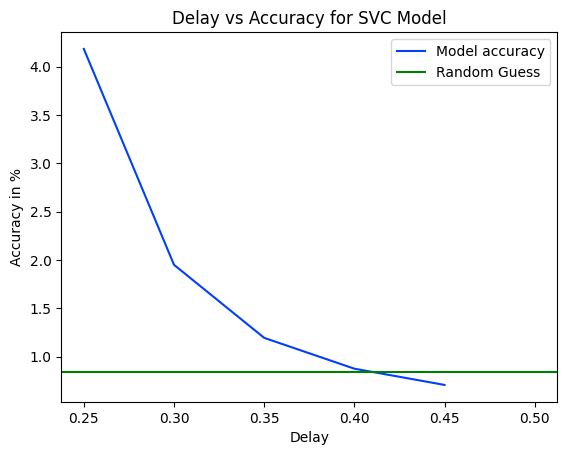

In [22]:
plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.title('Delay vs Accuracy for SVC Model')
plt.plot(delays, accuracies, label = 'Model accuracy')
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.legend()
plt.show()

In [23]:
delays = np.arange(0.0, 0.50, 0.025)
accuracies = []
for delay in delays:
    accuracies.append(experiment_with_delay(delay, natural_scenes))

Cross-validated mean accuracy: 19.1%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 24.1%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 28.9%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 31.5%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 32.1%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 27.5%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 19.7%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 13.8%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 9.4%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 6.5%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 4.2%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 2.8%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 1.9%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 1.6%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 1.2%
Ch?ance of random 

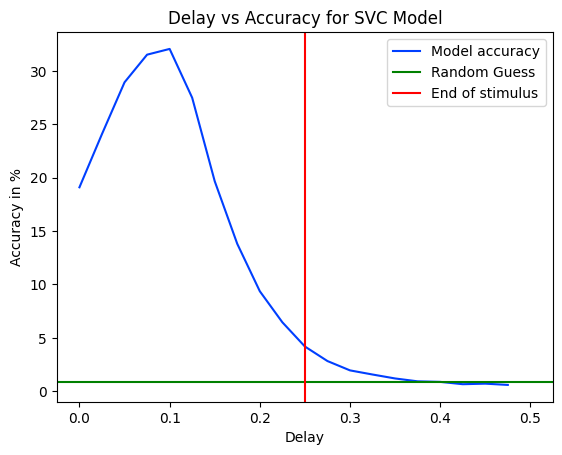

In [24]:
plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.title('Delay vs Accuracy for SVC Model')
plt.plot(delays, accuracies, label = 'Model accuracy')
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'red', label = 'End of stimulus')
plt.legend()
plt.show()

## Checking normalization effects 

In [83]:
delays = np.arange(0.0, 0.50, 0.025)
accuracies_with_norm = []
accuracies_without_norm = []
for delay in tqdm(delays, "Running experiment with delays"):
    accuracies_with_norm.append(experiment_with_delay(delay, natural_scenes, partial=None, norm=Normalizer(), withlogs=False))
    accuracies_without_norm.append(experiment_with_delay(delay, natural_scenes, partial=None, norm=None, withlogs=False))

Running experiment with delays: 100%|██████████| 20/20 [46:41<00:00, 140.08s/it]  


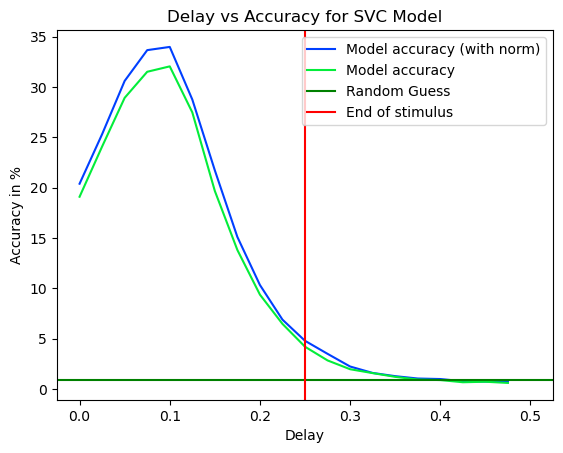

In [84]:
plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.title('Delay vs Accuracy for SVC Model')
plt.plot(delays, accuracies_with_norm, label = 'Model accuracy (with norm)')
plt.plot(delays, accuracies_without_norm, label = 'Model accuracy')
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'red', label = 'End of stimulus')
plt.legend()
plt.show()

# Trying lower window sizes 

It is possible that the initial increase in accurary is due to some statistical effects. We can do a similiar experiment trying a smaller window size. In theory we should observe the same phenomenon

In [26]:
delays = np.arange(0.0, 0.50, 0.025)
window_size = 0.05
accuracies = []
for delay in delays:
    accuracies.append(experiment_with_delay(delay, natural_scenes, window_size))
    

Cross-validated mean accuracy: 0.8%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 0.9%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 3.4%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 11.2%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 18.5%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 18.4%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 13.7%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 11.9%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 10.9%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 11.3%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 10.5%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 8.2%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 5.5%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 3.5%
Ch?ance of random guess: 0.84%
Cross-validated mean accuracy: 1.8%
Ch?ance of random 

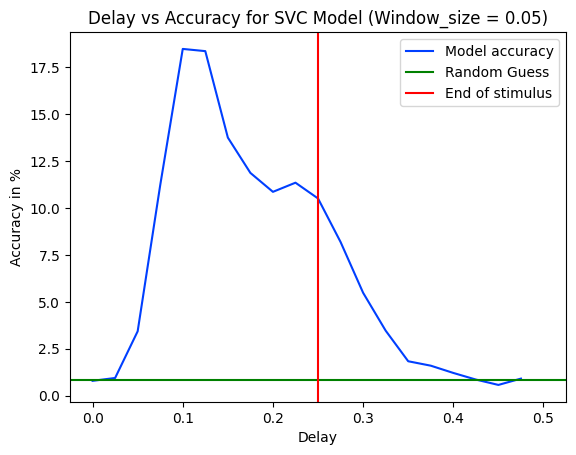

In [27]:
plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.title('Delay vs Accuracy for SVC Model (Window_size = 0.05)')
plt.plot(delays, accuracies, label = 'Model accuracy')
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'red', label = 'End of stimulus')
plt.legend()
plt.show()

idea : in one graph several of those for different window sizes...

idea: finding optimal window size.... 

idea: plot the variance of the labels.... then maybe we need to apply normalization <- heatmap

idea: best remembered images...

In [50]:
window_sizes = np.arange(0.05, 0.25 + 1e-5, 0.05)
result_per_window_size = {}

print(f'Window sizes : {list(window_sizes)}')
for window_size in window_sizes:
    delays = np.arange(0.0, 0.50, 0.025)
    accuracies = []
    for delay in tqdm(delays, desc=f"Calculating accurary curve for window_size = {window_size}..."):
        accuracies.append(experiment_with_delay(delay, natural_scenes, "VISam", window_size, withlogs = False))
    result_per_window_size[window_size] = (delays, accuracies)

Window sizes : [0.05, 0.1, 0.15000000000000002, 0.2, 0.25]


Calculating accurary curve for window_size = 0.05...: 100%|██████████| 20/20 [12:39<00:00, 37.98s/it]
Calculating accurary curve for window_size = 0.1...: 100%|██████████| 20/20 [12:15<00:00, 36.78s/it]
Calculating accurary curve for window_size = 0.15000000000000002...: 100%|██████████| 20/20 [12:20<00:00, 37.01s/it]
Calculating accurary curve for window_size = 0.2...: 100%|██████████| 20/20 [12:40<00:00, 38.03s/it]
Calculating accurary curve for window_size = 0.25...: 100%|██████████| 20/20 [56:09<00:00, 168.46s/it]  


In [61]:
import pickle

# Export dictionary to a JSON file
with open('cashed_data/result_per_window_size.pickle', 'wb') as pickle_file:
    pickle.dump(result_per_window_size, pickle_file)


In [43]:
with open('cashed_data/result_per_window_size.pickle', 'rb') as pickle_file:
    result_per_window_size = pickle.load(pickle_file)

result_per_window_size

{0.05: (array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
         0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
         0.45 , 0.475]),
  [0.7899159663865517,
   0.941176470588232,
   3.4285714285714275,
   11.210084033613443,
   18.47058823529412,
   18.352941176470587,
   13.747899159663865,
   11.865546218487392,
   10.857142857142858,
   11.344537815126051,
   10.504201680672269,
   8.184873949579833,
   5.478991596638656,
   3.4621848739495786,
   1.831932773109244,
   1.5966386554621859,
   1.2100840336134433,
   0.8571428571428541,
   0.5714285714285694,
   0.9075630252100808]),
 0.1: (array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
         0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
         0.45 , 0.475]),
  [1.8655462184873972,
   6.890756302521011,
   15.126050420168069,
   23.26050420168067,
   27.10924369747899,
   25.41176470588235,
   23.210084033613448,
   20.840336134453782,
   17.98319327

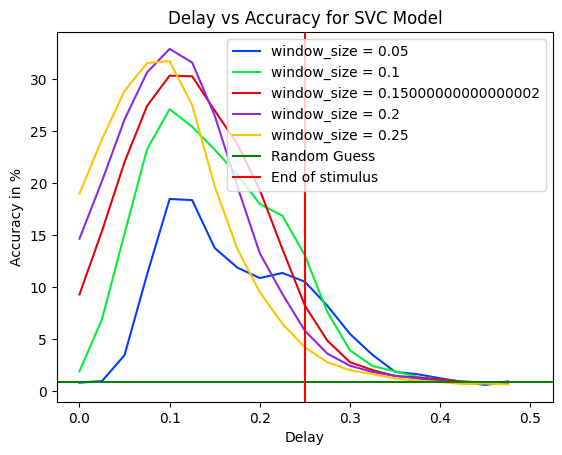

In [64]:
for window_size, result in result_per_window_size.items():
    plt.plot(result[0], result[1], label = f'window_size = {window_size}')
    
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'red', label = 'End of stimulus')
plt.title('Delay vs Accuracy for SVC Model')
plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.legend()
plt.show()

There is this weird inverse effect on the tail. The windows sizes with highest accuracy have the retention.

Heatmap of the variance. One the x-axis we have the delay. On the y-axis we have the window size. 

In [113]:
window_sizes = np.round(np.arange(0.05, 0.25 + 1e-5, 0.05), 2)
delays = np.round(np.arange(0.0, 0.50, 0.025), 2) 

variance_hm = []

for window_size in tqdm(window_sizes, "Calculating variance heatmap"):
    variance_lst = []
    for delay in delays:
        spike_vectors = get_spike_vectors(oursession, delay, natural_scenes, "VISam", window_size)
        spikes_presentation = spike_vectors.values.astype(float)
        variance_lst.append(spikes_presentation.var())
    variance_hm.append(variance_lst)

Calculating variance heatmap: 100%|██████████| 5/5 [08:22<00:00, 100.52s/it]


In [114]:
# Export dictionary to a pickle file
with open('cashed_data/variance_heatmanp.pickle', 'wb') as pickle_file:
    pickle.dump(variance_hm, pickle_file)

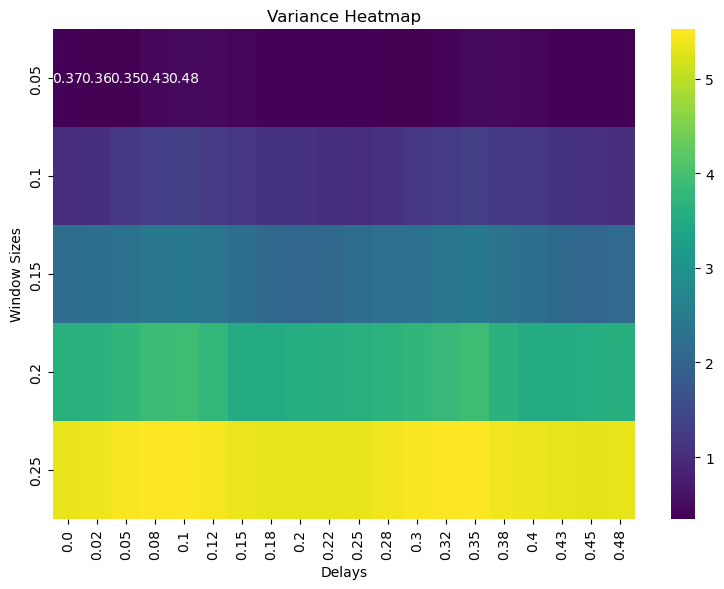

In [115]:
with open('cashed_data/variance_heatmanp.pickle', 'rb') as pickle_file:
    variance_hm = pickle.load(pickle_file)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(variance_hm, annot=True, cmap='viridis', xticklabels=delays, yticklabels=window_sizes)  # 'viridis' is just one of many available colormaps
plt.title('Variance Heatmap')
plt.xlabel('Delays')
plt.ylabel('Window Sizes')
plt.tight_layout()
plt.show()

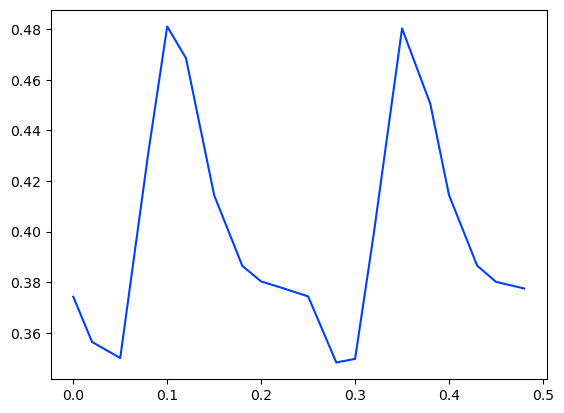

In [116]:
plt.plot(delays, variance_hm[0])

# Retention score 

In [105]:
def get_retention_score(delays, accuracies, stimulus_cutoff, random_guess):
    n = len(accuracies)
    retention_score = 0.0
    for i in range(n - 1):
        if delays[i + 1] < stimulus_cutoff:
            continue
        h1 = accuracies[i]
        h2 = accuracies[i + 1]
        x1 = delays[i]
        x2 = delays[i + 1]
        if delays[i] < stimulus_cutoff:
            h1 = (stimulus_cutoff - x1) / (x2 - x1) * (h2 - h1) + h1
            x1 = stimulus_cutoff
        if h1 < random_guess:
            continue
        if h2 < random_guess:
            x2 = (h1 - random_guess) / (h1 - h2) * (x2 - x1) + x1
            h2 = random_guess
        retention_score += (h1 + h2 - 2 * random_guess) * (x2 - x1) / 2.0
    return retention_score

def accuracy_per_label(confusion_matrix):
    # Calculate the sum of each row
    row_sums = confusion_matrix.sum(axis=1)
    
    # Calculate the diagonal elements
    diagonal = np.diag(confusion_matrix)
    
    # Divide diagonal by row sums
    accuracies = diagonal / row_sums.astype(float)
    
    return accuracies * 100.0

def average_matrix(matrix_list):
    # Sum up all matrices in the list
    sum_matrix = np.sum(matrix_list, axis=0)
    
    # Divide by the number of matrices in the list
    avg_matrix = sum_matrix / len(matrix_list)
    
    return avg_matrix

In [106]:
for window_size, result in result_per_window_size.items():
    print(f'Window_size = {window_size}, retention score = {get_retention_score(result[0], result[1], 0.25, 0.84)}')

Window_size = 0.05, retention score = 0.5391473109243698
Window_size = 0.1, retention score = 0.4812969327731095
Window_size = 0.15000000000000002, retention score = 0.3013829651860746
Window_size = 0.2, retention score = 0.2202241073762839
Window_size = 0.25, retention score = 0.15006863445378146


In [107]:
confusions = experiment_with_delay(0.0, natural_scenes, partial=None, get_confusions = True)

Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.0, partial = None, window_size = None
Cross-validated mean accuracy: 19.1%
Ch?ance of random guess: 0.84%


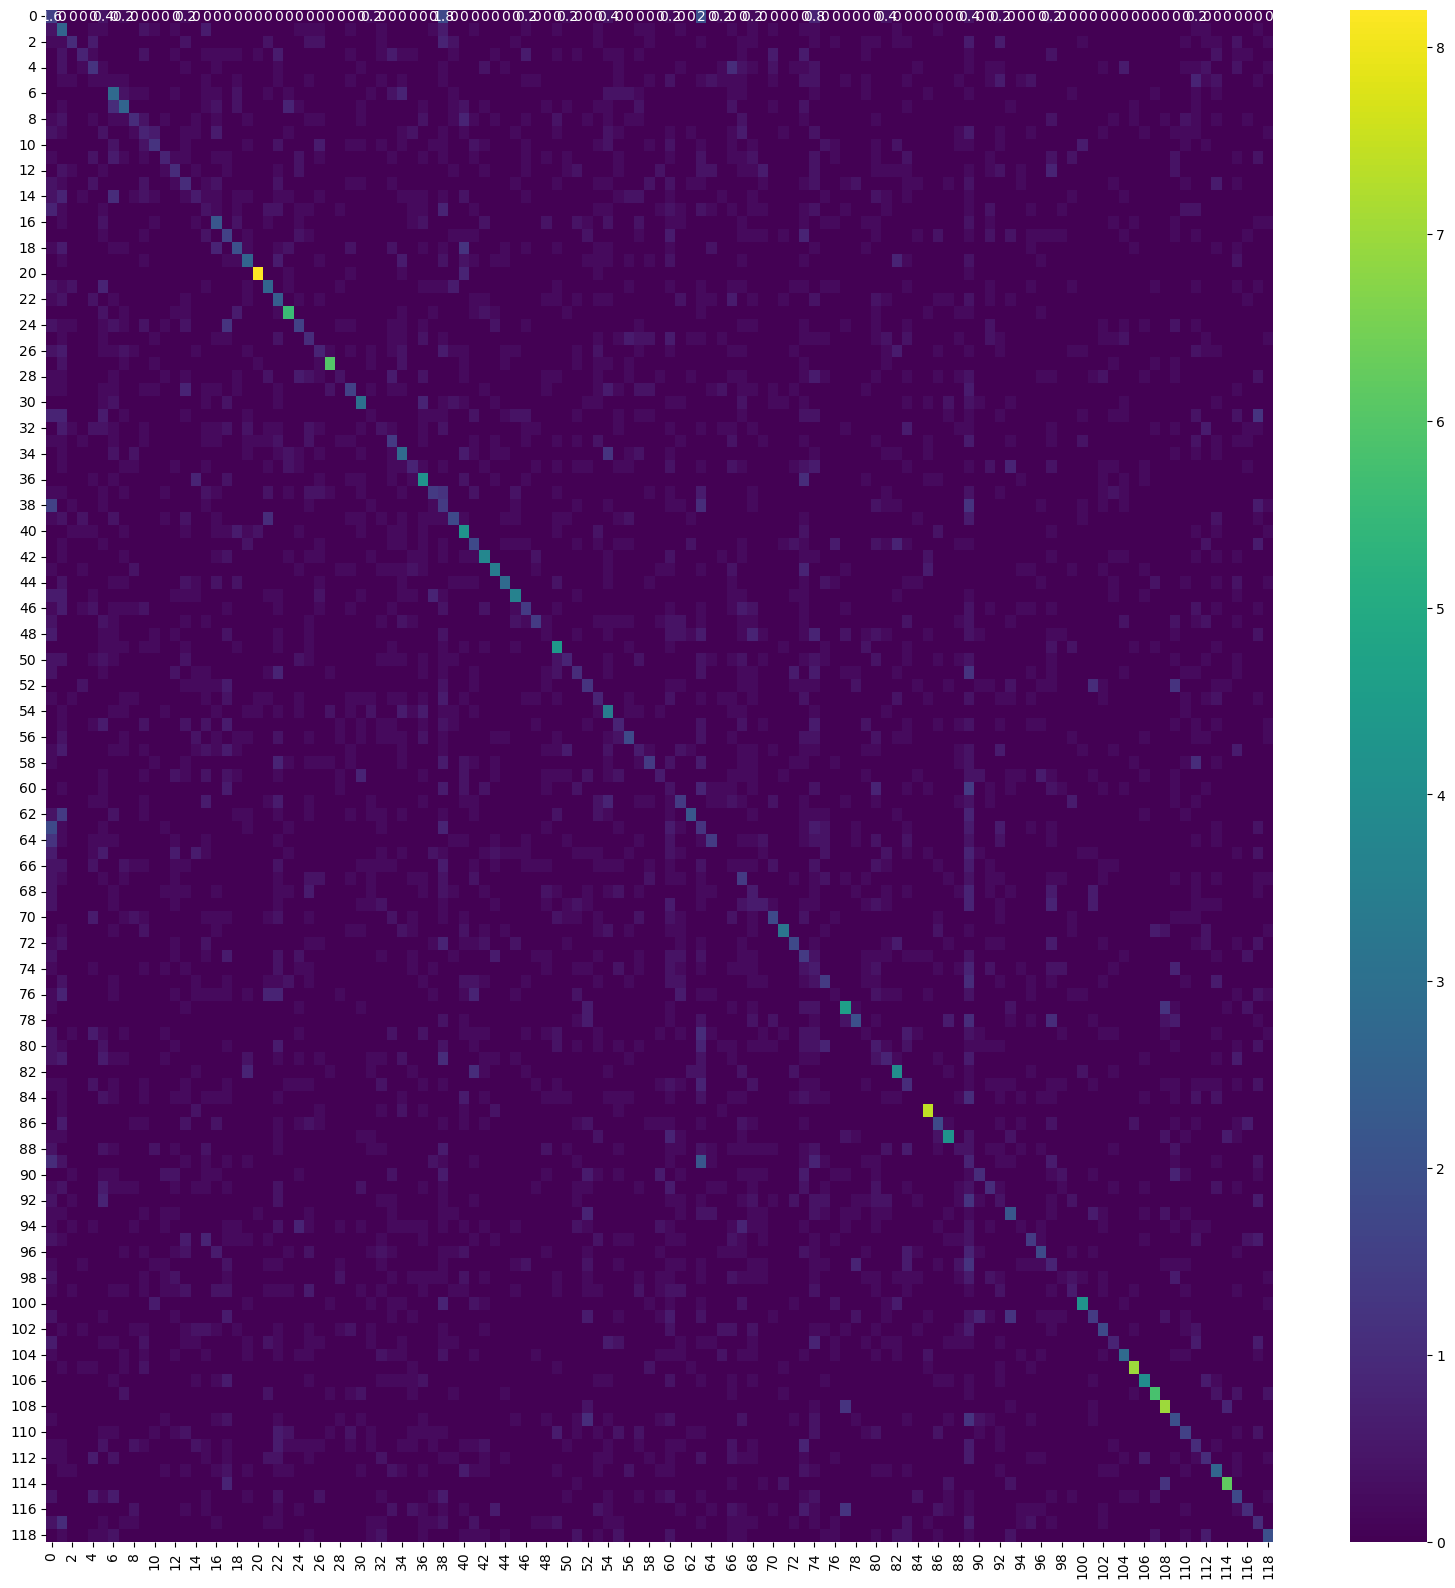

In [108]:
conf_matrix = average_matrix(confusions)

plt.figure(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True, cmap='viridis') 
plt.tight_layout()
plt.show()

In [31]:
accuracy_per_label(conf_matrix)

array([16., 26., 10.,  8., 12.,  2., 28., 26., 10.,  8., 12.,  8., 10.,
       10.,  6.,  4., 22., 16., 20., 26., 82., 26., 24., 56., 16., 10.,
        8., 60.,  4., 16., 30.,  2.,  4., 14., 28.,  8., 42., 14., 14.,
       18., 42., 18., 38., 34., 28., 36., 14., 14.,  2., 44.,  8., 10.,
       12.,  8., 34.,  8., 18.,  6., 14.,  6.,  4., 14., 22., 12., 14.,
        0.,  2., 14.,  6.,  6., 18., 32., 18., 14.,  6., 14.,  2., 46.,
       20.,  2.,  6.,  8., 40., 10.,  0., 74., 18., 42.,  4.,  8., 10.,
       10.,  4., 22.,  2., 14., 18.,  8.,  2.,  6., 42., 14., 18.,  8.,
       28., 70., 40., 58., 70., 20., 16., 10., 10., 26., 62., 18., 10.,
       10., 20.])

In [109]:
delays = np.arange(0.0, 0.50, 0.025)
window_size = 0.25
label_accuracies_per_delay = []
for delay in tqdm(delays, "Calculating label accuracies per delay"):
    conf_matrix = average_matrix(experiment_with_delay(delay, natural_scenes, withlogs=False, get_confusions = True))
    label_accuracies_per_delay.append(accuracy_per_label(conf_matrix))

label_accuracies_per_delay = np.stack(label_accuracies_per_delay).transpose()

Calculating label accuracies per delay: 100%|██████████| 20/20 [08:40<00:00, 26.02s/it]


In [110]:
for label in range(label_accuracies_per_delay.shape[0]):
  print(f'label = {label}, retention_score = {get_retention_score(delays, label_accuracies_per_delay[label], .25, 0.0084)}')

label = 0, retention_score = 0.0
label = 1, retention_score = 0.39874044100000017
label = 2, retention_score = 0.024790441
label = 3, retention_score = 0.12437044099999997
label = 4, retention_score = 0.2737408820000001
label = 5, retention_score = 0.0
label = 6, retention_score = 0.27395022050000006
label = 7, retention_score = 0.0
label = 8, retention_score = 0.0
label = 9, retention_score = 0.42311044100000006
label = 10, retention_score = 0.5487404410000002
label = 11, retention_score = 0.0
label = 12, retention_score = 0.149160882
label = 13, retention_score = 0.024790441000000007
label = 14, retention_score = 0.049580882
label = 15, retention_score = 0.09958044100000005
label = 16, retention_score = 0.4485311025
label = 17, retention_score = 0.049790220500000024
label = 18, retention_score = 0.024790441000000007
label = 19, retention_score = 0.17437044100000007
label = 20, retention_score = 1.6733201470000005
label = 21, retention_score = 0.5741604410000004
label = 22, retention_

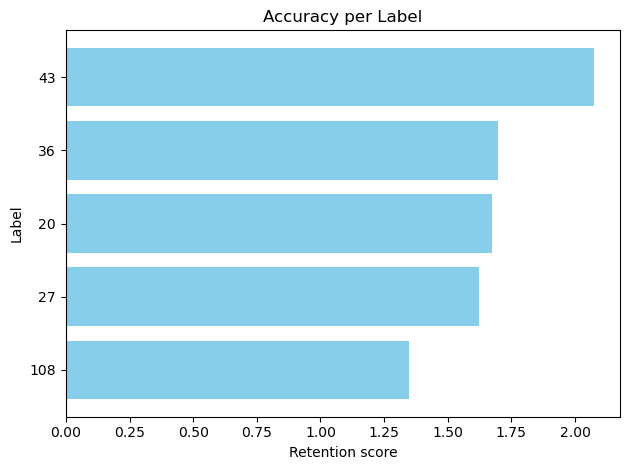

In [111]:
def plot_accuracy_bar_graph(data, k):
    # Sort the data based on accuracy
    sorted_data = sorted(data, key=lambda x: x[1])
    
    # Extract labels and accuracies
    labels = [item[0] for item in sorted_data]
    accuracies = [item[1] for item in sorted_data]

    labels = labels[-k:]
    accuracies = accuracies[-k:]

    # Create horizontal bar plot
    plt.barh(labels[:], accuracies[:], color='skyblue')
    
    # Add labels and title
    plt.xlabel('Retention score')
    plt.ylabel('Label')
    plt.title('Accuracy per Label')
    
    # Show plot
    plt.tight_layout()
    plt.show()

# Example list of tuples: (label, accuracy)
label_retention_scores = [(f'{label}', get_retention_score(delays, label_accuracies_per_delay[label], .25, 0.0084)) for label in range(label_accuracies_per_delay.shape[0])]

# data = [('Label 1', 0.85), ('Label 2', 0.75), ('Label 3', 0.92), ('Label 4', 0.68)]

plot_accuracy_bar_graph(label_retention_scores, 5)


In [262]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def plot_accuracy_bar_graph_with_images(data, images : dict, k : int):
    # Sort the data based on accuracy
    sorted_data = sorted(data, key=lambda x: x[1])
    sorted_data = sorted_data[-k:]


    # Extract labels and accuracies
    labels = [item[0] for item in sorted_data]
    accuracies = [item[1] for item in sorted_data]

    # Create horizontal bar plot
    fig, ax = plt.subplots(figsize=(10, 6 * (k / 5)))
    bars = ax.barh(np.arange(len(labels)), accuracies, color='skyblue')
    
    # Get the height of the bars
    bar_height = bars[0].get_height()
    
    # Load images and create image annotation for each bar
    for i, (label, accuracy) in enumerate(sorted_data):
        image = images[label]
        image = image.convert('L')
        image = np.array(image)  # Convert image to NumPy array
        image_height = image.shape[0] * (bar_height / 0.8)  # Calculate image height based on bar height
        image_width = image.shape[1] * (bar_height / 0.8)  # Calculate image width based on bar height
        zoom_ratio = 0.5 * bar_height / image.shape[0] * 100
        print(image.shape[1], bar_height)
        imagebox = OffsetImage(image, zoom=zoom_ratio, cmap='grey')
        ab = AnnotationBbox(imagebox, (0, i), frameon=True)
        # ab.xybox = (0, -image_height / 2)  # Adjust xybox to center the image vertically
        ax.add_artist(ab)

        print(ab.xy)
        ax.text(accuracy / 2, i, f'{accuracy:.2f}', ha='center', va='center', color='black', fontsize=8)

    # Add labels and title
    plt.xlabel('Retention Score')
    # plt.ylabel('Label')
    plt.title('Images with the best Retention Score') 
    
    # Set y-ticks to show labels
    ax.set_yticks(np.arange(len(labels)))
    ax.set_yticklabels(labels)
    
    # Show plot
    plt.show()
    print(labels)
    return labels

In [157]:
natural_scene_images = {str(label) : cache.get_natural_scene_template(label) for label in range(118)}

In [203]:
A = cache.get_natural_scene_template(0)
print(A)

<PIL.TiffImagePlugin.TiffImageFile image mode=L size=1174x918 at 0x16A53D850>


1174 0.8
(0, 0)
1174 0.8
(0, 1)
1174 0.8
(0, 2)
1174 0.8
(0, 3)
1174 0.8
(0, 4)
1174 0.8
(0, 5)
1174 0.8
(0, 6)
1174 0.8
(0, 7)
1174 0.8
(0, 8)
1174 0.8
(0, 9)


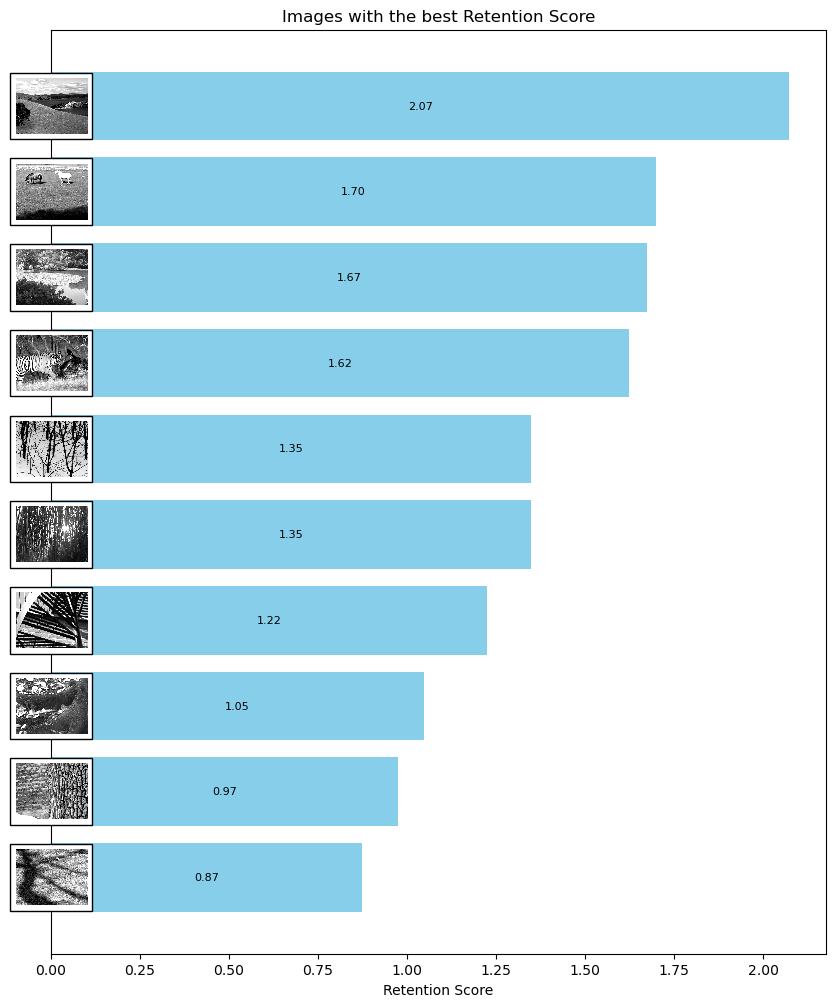

['117', '107', '99', '105', '77', '108', '27', '20', '36', '43']


In [263]:
best_retention_score_labels = plot_accuracy_bar_graph_with_images(label_retention_scores, natural_scene_images, 10)

In [264]:
print(best_retention_score_labels)

['117', '107', '99', '105', '77', '108', '27', '20', '36', '43']


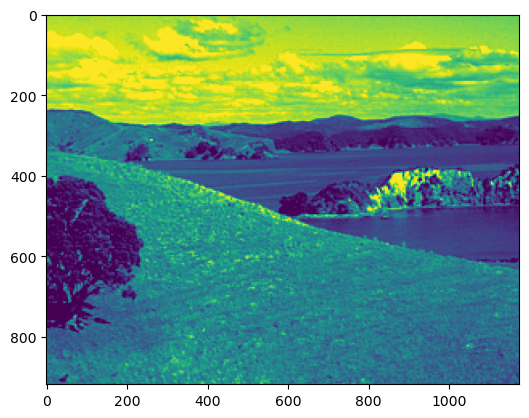

In [59]:
img = cache.get_natural_scene_template(43)
plt.imshow(img)

In [233]:
confusions = experiment_with_delay(0.0, natural_scenes, partial=None, get_confusions = True)
conf_matrix = average_matrix(confusions)
label_accuracies = accuracy_per_label(conf_matrix)
print(label_accuracies)

Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.0, partial = None, window_size = None
Cross-validated mean accuracy: 19.1%
Ch?ance of random guess: 0.84%
[16. 26. 10.  8. 12.  2. 28. 26. 10.  8. 12.  8. 10. 10.  6.  4. 22. 16.
 20. 26. 82. 26. 24. 56. 16. 10.  8. 60.  4. 16. 30.  2.  4. 14. 28.  8.
 42. 14. 14. 18. 42. 18. 38. 34. 28. 36. 14. 14.  2. 44.  8. 10. 12.  8.
 34.  8. 18.  6. 14.  6.  4. 14. 22. 12. 14.  0.  2. 14.  6.  6. 18. 32.
 18. 14.  6. 14.  2. 46. 20.  2.  6.  8. 40. 10.  0. 74. 18. 42.  4.  8.
 10. 10.  4. 22.  2. 14. 18.  8.  2.  6. 42. 14. 18.  8. 28. 70. 40. 58.
 70. 20. 16. 10. 10. 26. 62. 18. 10. 10. 20.]


[('0', 16.0), ('1', 26.0), ('2', 10.000000000000002), ('3', 8.000000000000002), ('4', 12.0), ('5', 2.0000000000000004), ('6', 28.000000000000004), ('7', 26.0), ('8', 10.0), ('9', 8.0), ('10', 12.0), ('11', 8.0), ('12', 10.0), ('13', 10.000000000000002), ('14', 6.0), ('15', 4.0), ('16', 22.000000000000004), ('17', 16.0), ('18', 20.0), ('19', 25.999999999999996), ('20', 82.0), ('21', 26.0), ('22', 24.0), ('23', 55.99999999999999), ('24', 16.0), ('25', 10.0), ('26', 8.0), ('27', 60.0), ('28', 3.9999999999999996), ('29', 16.0), ('30', 30.0), ('31', 1.9999999999999998), ('32', 4.000000000000001), ('33', 13.999999999999998), ('34', 27.999999999999996), ('35', 8.0), ('36', 42.00000000000001), ('37', 13.999999999999998), ('38', 14.000000000000002), ('39', 18.0), ('40', 42.00000000000001), ('41', 17.999999999999996), ('42', 38.0), ('43', 34.0), ('44', 28.000000000000004), ('45', 36.0), ('46', 14.000000000000002), ('47', 13.999999999999998), ('48', 2.0), ('49', 44.00000000000001), ('50', 8.0), (

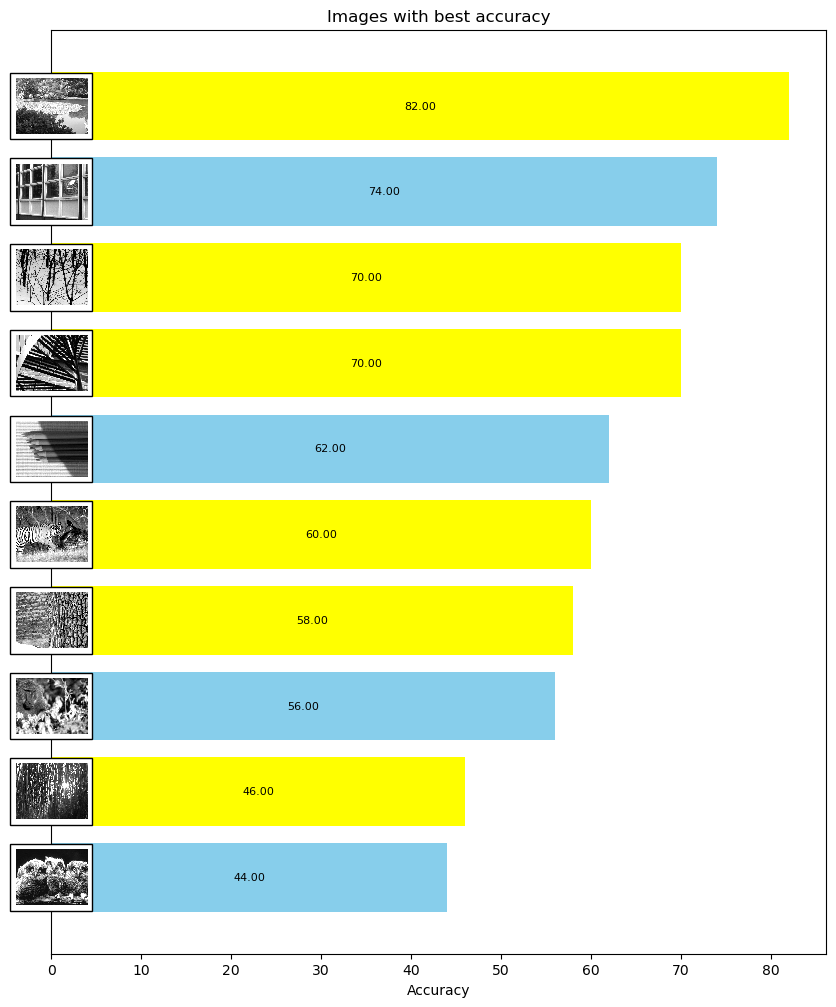

In [265]:
def plot_accuracy_bar_graph_with_images(data, images : dict, k : int, special_labels = None):
    # Sort the data based on accuracy
    sorted_data = sorted(data, key=lambda x: x[1])
    sorted_data = sorted_data[-k:]


    # Extract labels and accuracies
    labels = [item[0] for item in sorted_data]
    accuracies = [item[1] for item in sorted_data]

    # Create horizontal bar plot
    bar_colors = ['skyblue'] * len(labels)
    print(special_labels)
    if not special_labels is None:
        print(special_labels)
        for i, (label, color) in enumerate(sorted_data):
            if label in special_labels:
                bar_colors[i] =  'yellow'
    fig, ax = plt.subplots(figsize=(10, 6 * (k / 5)))
    bars = ax.barh(np.arange(len(labels)), accuracies, color=bar_colors)
    
    # Get the height of the bars
    bar_height = bars[0].get_height()
    
    # Load images and create image annotation for each bar
    for i, (label, accuracy) in enumerate(sorted_data):
        image = images[label]
        image = image.convert('L')
        image = np.array(image)  # Convert image to NumPy array
        zoom_ratio = 0.5 * bar_height / image.shape[0] * 100
        image_height = image.shape[0] * zoom_ratio # Calculate image height based on bar height
        image_width = image.shape[1] * zoom_ratio  # Calculate image width based on bar height
        print(image.shape[1], bar_height)
        imagebox = OffsetImage(image, zoom=zoom_ratio, cmap='grey')
        ab = AnnotationBbox(imagebox, (0, i), frameon=True)
        # ab.xybox = (0, -image_height / 2)  # Adjust xybox to center the image vertically
        ax.add_artist(ab)

        print(ab.xy)
        ax.text(accuracy / 2, i, f'{accuracy:.2f}', ha='center', va='center', color='black', fontsize=8)

    # Add labels and title
    plt.xlabel('Accuracy')
    # plt.ylabel('Label')
    plt.title('Images with best accuracy') 
    
    # Set y-ticks to show labels
    ax.set_yticks(np.arange(len(labels)))
    ax.set_yticklabels(labels)
    
    # Show plot
    plt.show()

data = [(f'{label}', label_accuracies[label])
                    for label in range(label_accuracies_per_delay.shape[0])]
print(data)
plot_accuracy_bar_graph_with_images(data, natural_scene_images, 10, special_labels=best_retention_score_labels)